<a href="https://colab.research.google.com/github/casjunior93/Desafio-Regressao---Tera/blob/master/Desafio_Regress%C3%A3o_Tera_Refeito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Habilitando acesso do Colab ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Bibliotecas fundamentais

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

# Roteiro do Projeto

O livro [Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/maos-a-obra/9788550803814/) traz uma sugestão de roteiro para orientar um projeto de aprendizado de máquina. Os passos gerais são:

1.   Abordar o problema e analisar o panorama em geral
2.   Obter os dados
3.   Explorar os dados para obter informações úteis
4.   Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina.
5.   Explorar modelos diferentes e selecionar os melhores.
6.   Aperfeiçoar os modelos e os combinar em uma solução ideal.
7.   Apresentar a solução.
8.   Implementar, monitorar e fazer a manutenção de seu sistema.

# 1 Abordar o problema e analisar o panorama em geral

Como mostra o excelente artigo [Precificação do imóvel através de estudo comparativo de mercado](https://remaxrs.com.br/blog/precificacao-do-imovel-atraves-de-estudo-comparativo-de-mercado-re-max/), definir o preço correto para a venda de um imóvel é muito importante, para evitar que se perca dinhero na venda de um imóvel ou que este seja supervalorizado, impedindo a venda. Por isso é importante atentar-se no processo de precificação, que envolve um conjunto de critérios como método, tempo e análise.

Como conhecimento de um expert da área de venda de imóveis, vou utilizar o artigo citado anteriormente para encontrar os principais atributos que influenciam na precificação de um imóvel. No artigo, encontramos que estes fatores são importantes:

* Localização
* Terreno
* Vizinhança
* Tipo de construção
* Idade
* Infraestrutura
* Segurança
* Acabamento
* Estado de conservação

Cabe analisar se os dados na base utilizada englobam os fatores de precificação apresentados.

# 2 Obter os dados

Dados: [Link](https://raw.githubusercontent.com/casjunior93/Desafio-Regressao---Tera/master/dados/base.csv)

Dicionário: [link](https://github.com/casjunior93/Desafio-Regressao---Tera/raw/master/dados/Dicion%C3%A1rio%20de%20dados.pdf)

## 2.1 Listar os dados necessários

Utilizando os fatores que influenciam na precificação, levantados no passo 1, torna-se necessário analisar se a base de dados que temos contém dados sobre estes fatores. Para esta análise, vou utilizar o dicionário dos dados fornecido no passo 2 para analisar os atributos que temos.

### 2.1.1 Atributos de **Localização**

*  `ClasseZona` - A classificação geral de zoneamento
*  `Rua` - Tipo de acesso rua
*  `Beco` - Tipo de acesso beco
*  `Bairro` - Locais dentro dos limites da cidade de Ames
*  `Estrada1` - Proximidade com estrada principal ou ferroviária
*  `Estrada2` - Proximidade de estrada principal ou ferroviária (se um segundo estiver presente)


### 2.1.2 Terreno

*  `TamanhoLote` - Tamanho do lote em pés quadrados
*  `FormaProp` - Forma geral da propriedade
*  `PlanoProp` - Planicidade da propriedade
*  `ConfigLote` - Configuração Lote
*  `InclinacaoLote` - Inclinação da propriedade

## 2.2 Carregar os dados

In [ ]:
df_original = pd.read_csv('https://raw.githubusercontent.com/casjunior93/Desafio-Regressao---Tera/master/dados/base.csv')

## 2.3 Verifique o tamanho dos dados

In [ ]:
print(f'Total registros: {df_original.shape[0]}')

Total registros: 1460


## 2.4 Estrutura dos dados

### 2.4.1 Primeiros registros

In [ ]:
df_original.head(10)

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,...,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.00,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.00,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.00,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.00,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### 2.4.2 Informações gerais dos dados

Rápida descrição dos dados, como total de linhas, tipo dos dados e valores não nulos.

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

Resumo geral dos atributos.

In [ ]:
df_original.iloc[:,0:10].describe(include='all')

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos
count,1460.00,1460.00,1460,1201.00,1460.00,1460,91,1460,1460,1460
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459
mean,730.50,56.90,NaN,70.05,10516.83,NaN,NaN,NaN,NaN,NaN
std,421.61,42.30,NaN,24.28,9981.26,NaN,NaN,NaN,NaN,NaN
min,1.00,20.00,NaN,21.00,1300.00,NaN,NaN,NaN,NaN,NaN
25%,365.75,20.00,NaN,59.00,7553.50,NaN,NaN,NaN,NaN,NaN
50%,730.50,50.00,NaN,69.00,9478.50,NaN,NaN,NaN,NaN,NaN
75%,1095.25,70.00,NaN,80.00,11601.50,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_original.iloc[:,10:20].describe(include='all')

,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao
count,1460,1460,1460,1460,1460,1460,1460,1460.00,1460.00,1460.00
unique,5,3,25,9,8,5,8,NaN,NaN,NaN
top,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN
freq,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.10,5.58,1971.27
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.38,1.11,30.20
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1872.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,5.00,1954.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,5.00,1973.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,6.00,2000.00


In [ ]:
df_original.iloc[:,20:30].describe(include='all')

,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao
count,1460.00,1460,1460,1460,1460,1452,1452.00,1460,1460,1460
unique,NaN,6,8,15,16,4,NaN,4,5,6
top,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc
freq,NaN,1141,1434,515,504,864,NaN,906,1282,647
mean,1984.87,NaN,NaN,NaN,NaN,NaN,103.69,NaN,NaN,NaN
std,20.65,NaN,NaN,NaN,NaN,NaN,181.07,NaN,NaN,NaN
min,1950.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
25%,1967.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
50%,1994.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
75%,2004.00,NaN,NaN,NaN,NaN,NaN,166.00,NaN,NaN,NaN


In [ ]:
df_original.iloc[:,30:40].describe(include='all')

,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento
count,1423,1423,1422,1423,1460.00,1422,1460.00,1460.00,1460.00,1460
unique,4,4,4,6,NaN,6,NaN,NaN,NaN,6
top,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA
freq,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428
mean,NaN,NaN,NaN,NaN,443.64,NaN,46.55,567.24,1057.43,NaN
std,NaN,NaN,NaN,NaN,456.10,NaN,161.32,441.87,438.71,NaN
min,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,NaN
25%,NaN,NaN,NaN,NaN,0.00,NaN,0.00,223.00,795.75,NaN
50%,NaN,NaN,NaN,NaN,383.50,NaN,0.00,477.50,991.50,NaN
75%,NaN,NaN,NaN,NaN,712.25,NaN,0.00,808.00,1298.25,NaN


In [ ]:
df_original.iloc[:,50:60].describe(include='all')

,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,QualdiadeLareira,LocalGaragem,AnoGaragem
count,1460.00,1460.00,1460.00,1460,1460.00,1460,1460.00,770,1379,1379.00
unique,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN
top,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN
freq,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN
mean,0.38,2.87,1.05,NaN,6.52,NaN,0.61,NaN,NaN,1978.51
std,0.50,0.82,0.22,NaN,1.63,NaN,0.64,NaN,NaN,24.69
min,0.00,0.00,0.00,NaN,2.00,NaN,0.00,NaN,NaN,1900.00
25%,0.00,2.00,1.00,NaN,5.00,NaN,0.00,NaN,NaN,1961.00
50%,0.00,3.00,1.00,NaN,6.00,NaN,1.00,NaN,NaN,1980.00
75%,1.00,3.00,1.00,NaN,7.00,NaN,1.00,NaN,NaN,2002.00


In [ ]:
df_original.iloc[:,60:70].describe(include='all')

,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes
count,1379,1460.00,1460.00,1379,1379,1460,1460.00,1460.00,1460.00,1460.00
unique,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN
top,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN
freq,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN
mean,NaN,1.77,472.98,NaN,NaN,NaN,94.24,46.66,21.95,3.41
std,NaN,0.75,213.80,NaN,NaN,NaN,125.34,66.26,61.12,29.32
min,NaN,0.00,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00
25%,NaN,1.00,334.50,NaN,NaN,NaN,0.00,0.00,0.00,0.00
50%,NaN,2.00,480.00,NaN,NaN,NaN,0.00,25.00,0.00,0.00
75%,NaN,2.00,576.00,NaN,NaN,NaN,168.00,68.00,0.00,0.00


In [ ]:
df_original.iloc[:,70:82].describe(include='all')

,AreaAlpendre,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
count,1460.00,1460.00,7,281,54,1460.00,1460.00,1460.00,1460,1460,1460.00
unique,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,15.06,2.76,NaN,NaN,NaN,43.49,6.32,2007.82,NaN,NaN,180921.20
std,55.76,40.18,NaN,NaN,NaN,496.12,2.70,1.33,NaN,NaN,79442.50
min,0.00,0.00,NaN,NaN,NaN,0.00,1.00,2006.00,NaN,NaN,34900.00
25%,0.00,0.00,NaN,NaN,NaN,0.00,5.00,2007.00,NaN,NaN,129975.00
50%,0.00,0.00,NaN,NaN,NaN,0.00,6.00,2008.00,NaN,NaN,163000.00
75%,0.00,0.00,NaN,NaN,NaN,0.00,8.00,2009.00,NaN,NaN,214000.00


Histograma dos atributos

CPU times: user 2.67 s, sys: 63.5 ms, total: 2.73 s
Wall time: 3.35 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffbb35c0ac0>,
      dtype=object)

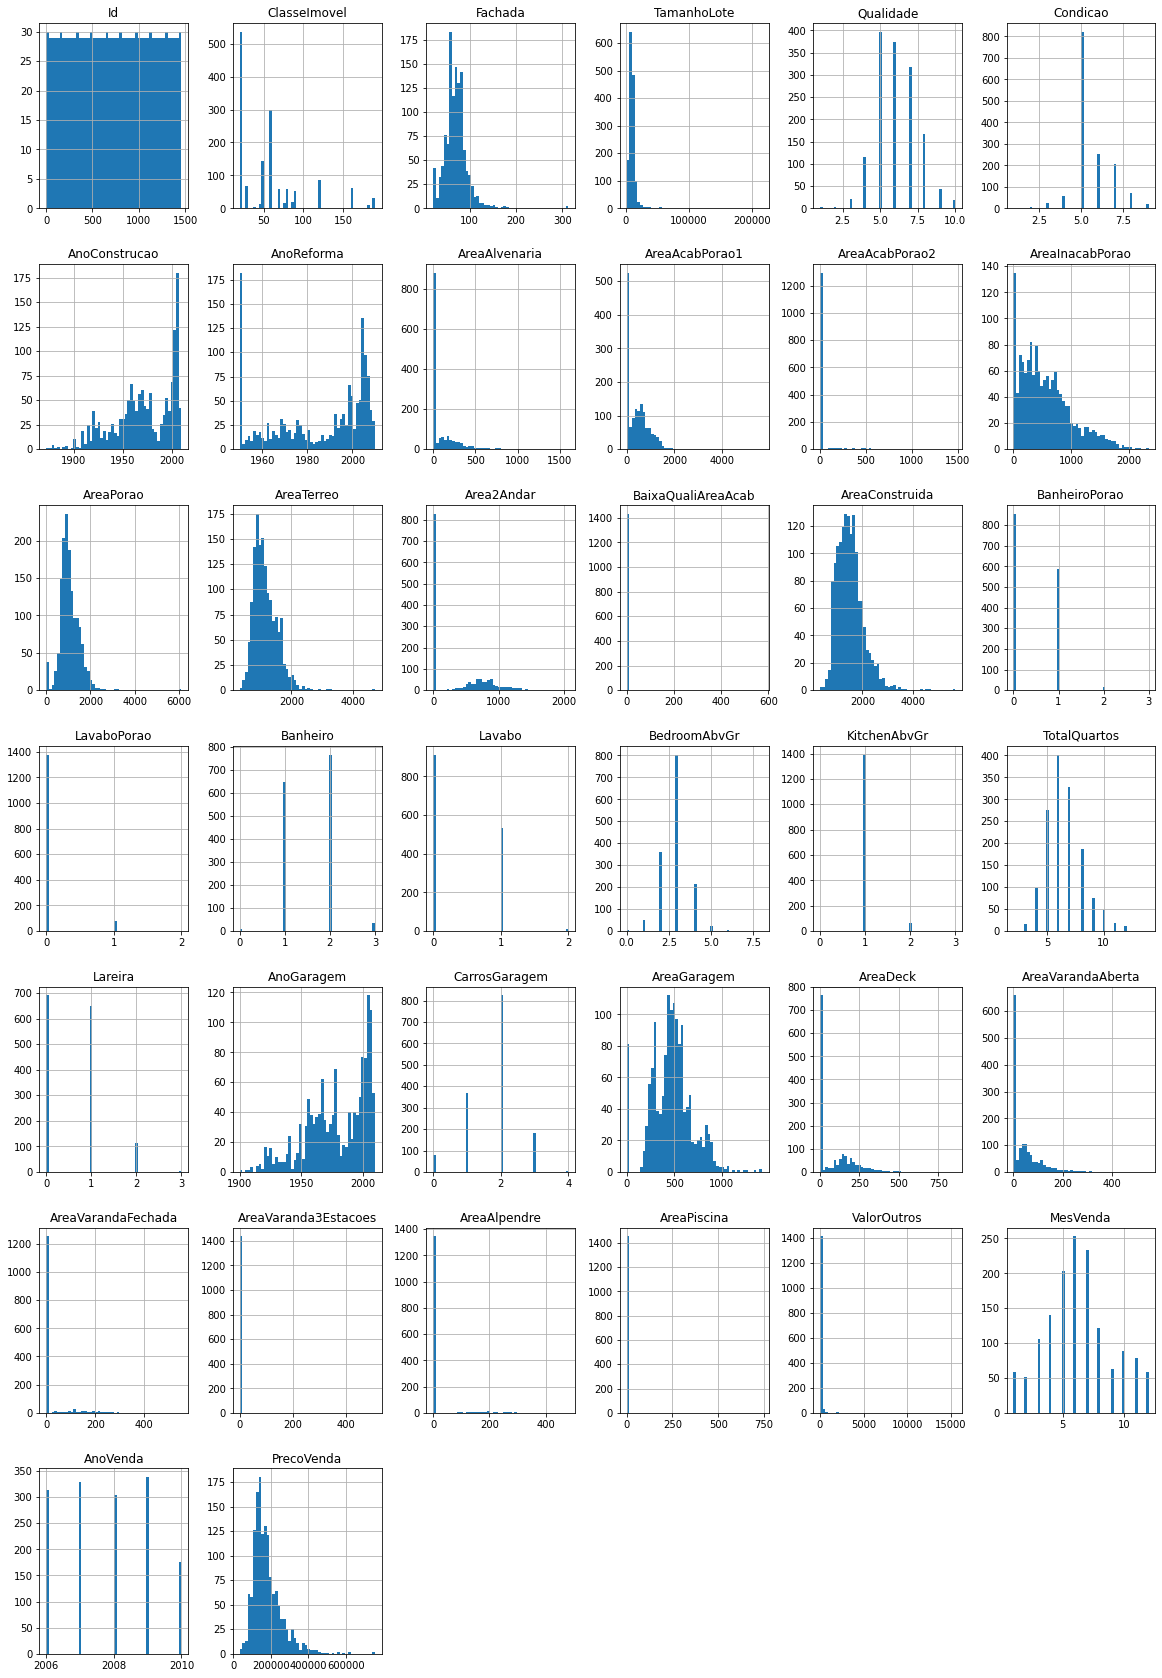

In [ ]:
%%time
df_original.hist(bins=50, figsize=(20,30))

## 2.3 Separando um conjunto de teste (20%)

In [ ]:
msk = np.random.rand(len(df_original)) < 0.20 # cria uma mascara com as posicoes
df_teste = df_original[msk]
df_treino = df_original[~msk]

In [ ]:
print(f'Qtde teste: {df_teste.shape[0]}')
print(f'Qtde treino: {df_treino.shape[0]}')

Qtde teste: 294
Qtde treino: 1166


# 3 Explorar os dados para obter informações úteis